In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install rdkit

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
df = pd.read_excel('All (2).xlsx')

In [ ]:
df['SI'] = df['CC50-MDCK, mmg/ml']/df['IC50, mmg/ml']
df['S_leng'] = df['SMILES'].str.len ()

In [ ]:
df.head()

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures,S_leng
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,50.0,35
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,51.0,35
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0,41
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0,39
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0,44


In [ ]:
df.describe()

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,Pictures,S_leng
count,1468.000000,1468.000000,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000,727.000000,1468.000000
mean,50.277063,186.491530,2.210854e+04,384.739636,3.831744,1.333787,81.273215,364.909216,62.997956
std,92.184768,1009.454293,4.771268e+05,153.164268,2.860473,1.803663,54.078778,210.154325,32.373175
min,0.000010,0.031928,3.616134e-02,110.157000,0.000000,0.000000,0.000000,1.000000,13.000000
25%,2.500000,30.375000,1.833333e+00,283.049250,2.000000,0.000000,39.440000,183.500000,46.000000
50%,10.100000,90.400000,5.528073e+00,349.371000,3.000000,1.000000,71.840000,365.000000,55.000000
75%,49.450000,300.000000,2.778741e+01,446.508000,5.000000,2.000000,106.160000,546.500000,68.000000
max,1000.000000,37646.000000,1.632222e+07,1159.380000,19.000000,11.000000,319.510000,728.000000,279.000000


In [ ]:
df['Title'].size

1408

In [ ]:
df = df[df.SI <= 100]

In [ ]:
df = df[df['IC50, mmg/ml'] < 250]
df = df[df['CC50-MDCK, mmg/ml'] < 250]
df = df[df.S_leng < 120]
df = df[df.SI <= 100]

In [ ]:
df = df[df.S_leng < 140]
df = df[df['IC50, mmg/ml'] < 310]

In [ ]:
df.columns

Index(['Title', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight',
       'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES',
       'Pictures', 'S_leng'],
      dtype='object')

In [ ]:
df_w = df[[ 'IC50, mmg/ml', 'SMILES']]

In [ ]:
df_w.describe()

,"IC50, mmg/ml"
count,1408.000000
mean,47.227790
std,79.944935
min,0.000010
25%,2.500000
50%,10.150000
75%,49.675000
max,300.500000


## Анализ данных

<Axes: xlabel='S_leng', ylabel='Count'>

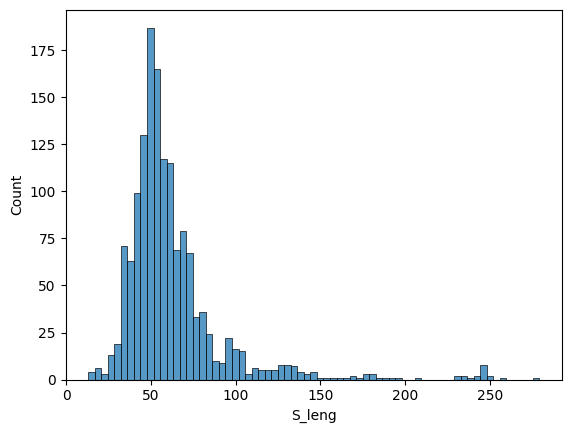

In [ ]:
sns.histplot(df['S_leng'])

<Axes: xlabel='IC50, mmg/ml', ylabel='Count'>

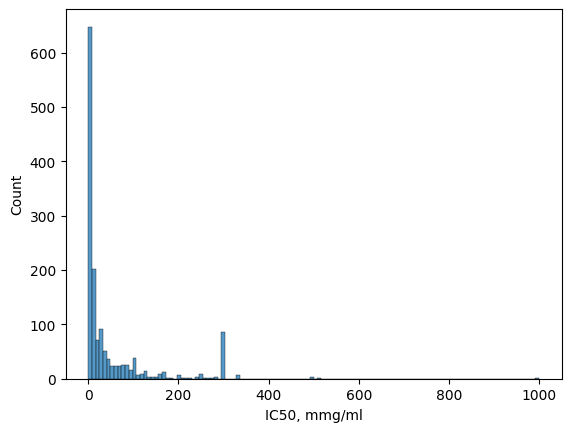

In [ ]:
sns.histplot(df['IC50, mmg/ml'])

In [ ]:
df[df['IC50, mmg/ml'] < 250]

In [ ]:
df_v = df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight',
       'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'S_leng']]

In [ ]:
df_v = df_v[df_v.SI < 500]
df_v = df_v[df_v.S_leng < 140]

In [ ]:
df_v.describe()

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,S_leng
count,1408.000000,1408.000000,1.408000e+03,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,47.227790,181.530374,2.300791e+04,369.176016,3.574574,1.169034,76.884169,58.690341
std,79.944935,1028.071009,4.871729e+05,122.693687,2.414739,1.496684,47.830747,20.210706
min,0.000010,0.031928,3.616134e-02,110.157000,0.000000,0.000000,0.000000,13.000000
25%,2.500000,30.275000,1.849488e+00,281.398000,2.000000,0.000000,39.440000,46.000000
50%,10.150000,89.850000,5.469158e+00,345.306000,3.000000,1.000000,69.650000,54.000000
75%,49.675000,300.000000,2.723370e+01,434.475750,5.000000,2.000000,101.962500,67.000000
max,300.500000,37646.000000,1.632222e+07,812.925000,17.000000,11.000000,296.980000,139.000000


<Axes: >

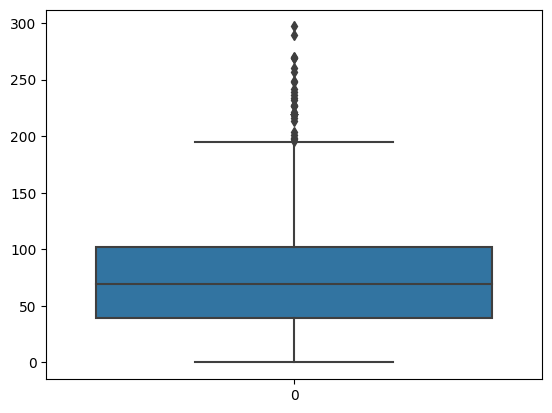

In [ ]:
sns.boxplot(df['Polar SA'])

In [ ]:
df_v.groupby('Hydrogen bond acceptors')['IC50, mmg/ml'].mean()

Hydrogen bond acceptors
0     19.022642
1     50.217042
2     49.612736
3     63.169360
4     42.623339
5     44.459913
6     33.063224
7     30.037468
8     45.752852
9     60.270995
10    22.390000
11    71.120000
12    36.233333
13    17.450000
14     0.950000
15     9.413933
16    27.750000
17    27.700000
Name: IC50, mmg/ml, dtype: float64

In [ ]:
df_v.groupby('Hydrogen bond donors')['IC50, mmg/ml'].mean()

Hydrogen bond donors
0     45.346271
1     64.581478
2     46.278662
3     20.392157
4      6.591926
5      4.312929
6      6.412589
7     13.275000
8     17.381967
9     18.800000
10    27.750000
11    27.700000
Name: IC50, mmg/ml, dtype: float64

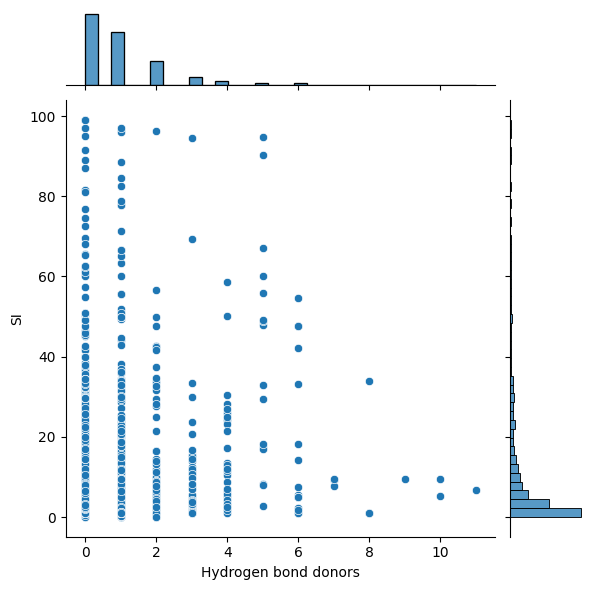

In [ ]:
sns.jointplot(x='Hydrogen bond donors', y='SI', data=df_v);

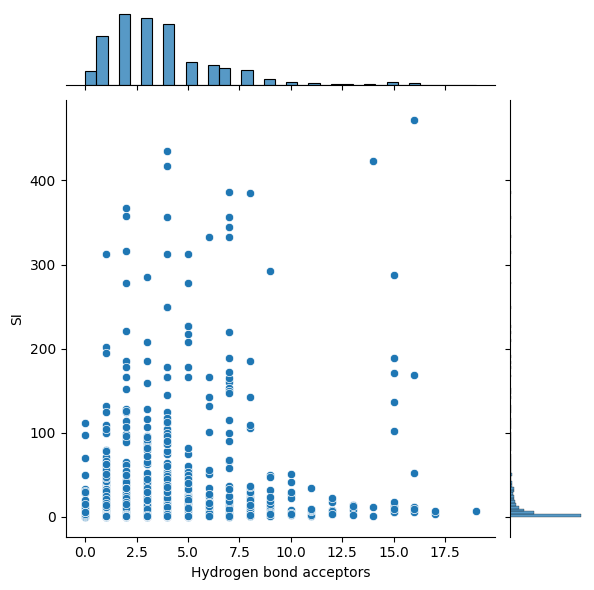

In [ ]:
sns.jointplot(x='Hydrogen bond acceptors', y='SI', data=df_v);

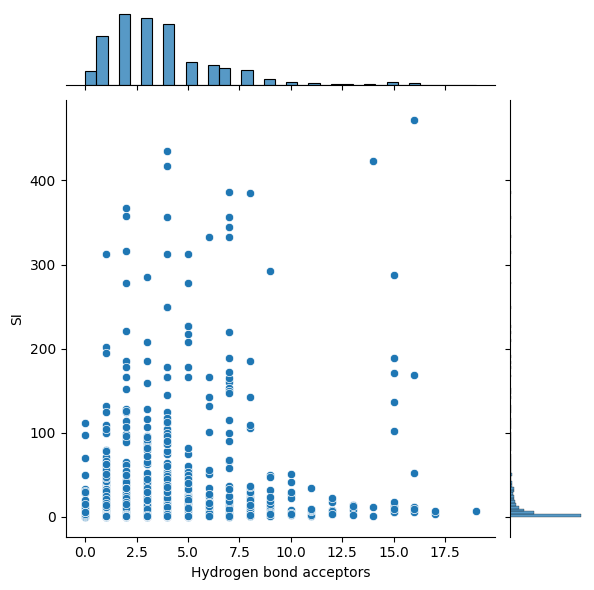

In [ ]:
sns.jointplot(x='Hydrogen bond acceptors', y='SI', data=df_v);

In [ ]:
df_v.corr()

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,S_leng
"IC50, mmg/ml",1.000000,0.041928,-0.027915,-0.079176,-0.038622,-0.123526,-0.070082,-0.074757
"CC50-MDCK, mmg/ml",0.041928,1.000000,0.022510,-0.009572,-0.023458,0.004398,0.010386,-0.001949
SI,-0.027915,0.022510,1.000000,-0.003564,0.018826,0.025557,0.063151,-0.000465
Molecular weight,-0.079176,-0.009572,-0.003564,1.000000,0.599001,0.311860,0.663605,0.832344
Hydrogen bond acceptors,-0.038622,-0.023458,0.018826,0.599001,1.000000,0.506830,0.767056,0.495037
Hydrogen bond donors,-0.123526,0.004398,0.025557,0.311860,0.506830,1.000000,0.671514,0.378091
Polar SA,-0.070082,0.010386,0.063151,0.663605,0.767056,0.671514,1.000000,0.576099
S_leng,-0.074757,-0.001949,-0.000465,0.832344,0.495037,0.378091,0.576099,1.000000


## Векторайзер

In [ ]:
OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df_w,'SMILES','Molecule')
df_w[["SMILES","Molecule"]]

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,SMILES,Molecule
0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x789251e68ba0>
1,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x789251e68c10>
2,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x789251e68c80>
3,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x789251e68cf0>
4,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,<rdkit.Chem.rdchem.Mol object at 0x789251e68d60>
...,...,...
1463,CCCCCCCc1c(OC)c(C)c(=O)oc1,<rdkit.Chem.rdchem.Mol object at 0x789251e93680>
1464,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,<rdkit.Chem.rdchem.Mol object at 0x789251e936f0>
1465,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,<rdkit.Chem.rdchem.Mol object at 0x789251e93760>
1466,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,<rdkit.Chem.rdchem.Mol object at 0x789251e937d0>


In [ ]:
!python -m pip install git+https://github.com/EBjerrum/molvecgen

  Cloning https://github.com/EBjerrum/molvecgen to /tmp/pip-req-build-seo6zn72
  Running command git clone --filter=blob:none --quiet https://github.com/EBjerrum/molvecgen /tmp/pip-req-build-seo6zn72
  Resolved https://github.com/EBjerrum/molvecgen to commit f81d5aade18bea60882f5845877f6283366bbe91
  Preparing metadata (setup.py) ... done
  Created wheel for molvecgen: filename=molvecgen-0.1-py3-none-any.whl size=11357 sha256=5b33c913ff64c408c43d4de7f43fcf6ff98331eab4ff97bd9cb9f1204aea99ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-6olnlz25/wheels/1c/de/14/fd9892b48271e63e56b00c7015c754ae6189e258fa313a7c63
Successfully built molvecgen


In [ ]:
from molvecgen.vectorizers import SmilesVectorizer

In [ ]:
smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)
smivec.fit(df_w.Molecule.values, )

In [ ]:
print(smivec.charset)
smivec.dims

S-i/P7a=CO(rs31F52N\[4#Ic+6H)e@]Bn.lo^$?


(137, 40)

In [ ]:
print("Maximum allowed SMILES length %s"%smivec.maxlength)

Maximum allowed SMILES length 136


In [ ]:
y = df_w['IC50, mmg/ml'].values.reshape((-1,1))
X = df_w.Molecule.values
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.2, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [ ]:
y_train

In [ ]:
from pprint import pprint

In [ ]:
y_train.shape

(844, 1)

In [ ]:
y_test.shape

(352, 1)

In [ ]:
y_validation.shape

(212, 1)

In [ ]:
class SMILESMolDataset(Dataset):
    def __init__(self, molecules, y, vectorizer):
        self.molecules = molecules
        self.y = y
        self.vectorizer = vectorizer
    def __len__(self):
        return len(self.molecules)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mols = self.molecules[idx]

        #The vectorizer was written to work with batches,
        #but PyTorch datasets unfortunately works with single samples
        sample = self.vectorizer.transform([mols])[0]
        label = self.y[idx]
        return sample, label

In [ ]:
train_dataset = SMILESMolDataset(X_train, y_train, smivec)
train_dataset[78]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int8),
 array([-0.53050703]))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
X_validation_t = smivec.transform(X_validation, canonical=False)
X_validation_t = torch.tensor(X_validation_t, device=device).float()
y_validation_t = torch.tensor(y_validation, device=device).float()
y_validation_t = torch.nan_to_num(y_validation_t, nan = torch.nanmean(y_validation_t))
X_validation_t.shape

cuda:0


torch.Size([212, 137, 40])

In [ ]:
class Net(nn.Module):
    def __init__(self, dimensions, lstm_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()

        length = dims[0]
        number_tokens = dims[1]


        self.lstm = nn.GRU(input_size=number_tokens, hidden_size=lstm_size, num_layers=1, batch_first=True, bidirectional=False, dropout  = 0.2)
        self.fc1 = nn.Linear(lstm_size, hidden_size) # Output layer
        self.activation = nn.ReLU() # Non-Linear ReLU Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size//2) # Output layer
        self.activation2 = nn.ReLU() # Non-Linear ReLU Layer
        self.fc_out = nn.Linear(hidden_size//2, out_size) # Output layer
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):# Forward pass: stacking each layer together
        #out, (h_n, c_n) = self.lstm(x) #LSTM network reads in one-hot-encoded SMILES, h_n is last output, out is for all timesteps
        out, h_n = self.lstm(x) #GRU network reads in one-hot-encoded SMILES, h_n is last output, out is for all timesteps
        out = self.dropout(h_n) #Dropout
        out = self.fc1(out) # Pass into the hidden layer
        out = self.activation(out) # Use ReLU on hidden activation
        out = self.fc2(out) # Pass into the hidden layer
        out = self.activation2(out) # Use ReLU on hidden activation
        out = self.dropout(out) # dropout
        out = self.fc_out(out) # Use a linear layer for the output
        return out

epochs = 400
dims = smivec.dims
lstm_size = 32  # The size of the LSTM layer
hidden_size = 32  # The size of the hidden non-linear layer
dropout_rate = 0.4 # The dropout rate
output_size = 1        # This is just a single task, so this will be one
batch_size = 64   # The mini_batch size during training
learning_rate = 0.005  # The initial learning rate for the optimizer

In [ ]:
epochs = 100
dims = smivec.dims
lstm_size = 32  # The size of the LSTM layer
hidden_size = 32  # The size of the hidden non-linear layer
dropout_rate = 0.3 # The dropout rate
output_size = 1        # This is just a single task, so this will be one
batch_size = 64   # The mini_batch size during training
learning_rate = 0.01  # The initial learning rate for the optimizer

In [ ]:
model = Net(smivec, lstm_size, hidden_size, dropout_rate, output_size)
model.cuda()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Net(
  (lstm): GRU(40, 32, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=32, out_features=32, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (activation2): ReLU()
  (fc_out): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
pred = model.forward(X_validation_t[10:11])
pred

tensor([[[0.0885]]], device='cuda:0', grad_fn=<ViewBackward0>)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50,
                  verbose=True, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=1e-6, eps=1e-08)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers=4)

In [ ]:
for smiles, labels in train_loader:
    print(smiles)
    print(labels)
    break

In [ ]:
model.train() #Ensure the network is in "train" mode with dropouts active
train_losses = []
validation_losses = []
for e in range(epochs):
    running_loss = 0
    for smiles, labels in train_loader:
        # Push numpy to CUDA tensors
        smiles = torch.tensor(smiles, device=device).float()
        #print(smiles)
        labels = torch.tensor(labels, device=device).float()
        labels = torch.nan_to_num(labels, nan = torch.nanmean(labels))
        #print(labels)
        #break
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pass

        output = model(smiles) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step() # Optimize the weights

        running_loss += loss.item()
    else:


        model.eval()
        validation_loss = torch.mean(( y_validation_t - model(X_validation_t) )**2).item()
        model.train()

        lr_scheduler.step(validation_loss)

        train_loss = running_loss/len(train_loader)
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        if (e+1)%5 == 0:
            print("Epoch %i, Training loss: %0.2F Validation loss: %0.2F"%(e + 1, train_loss, validation_loss))


<ipython-input-63-37434c2c50fc>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  smiles = torch.tensor(smiles, device=device).float()
<ipython-input-63-37434c2c50fc>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, device=device).float()


Epoch 5, Training loss: 1.01 Validation loss: 0.98
Epoch 10, Training loss: 1.04 Validation loss: 0.99
Epoch 15, Training loss: 1.00 Validation loss: 0.98
Epoch 20, Training loss: 1.02 Validation loss: 0.95
Epoch 25, Training loss: 0.93 Validation loss: 0.94
Epoch 30, Training loss: 0.96 Validation loss: 0.94
Epoch 35, Training loss: 0.95 Validation loss: 0.93
Epoch 40, Training loss: 0.92 Validation loss: 0.96
Epoch 45, Training loss: 0.96 Validation loss: 0.94
Epoch 50, Training loss: 1.01 Validation loss: 0.92
Epoch 55, Training loss: 1.06 Validation loss: 0.95
Epoch 60, Training loss: 0.96 Validation loss: 0.93
Epoch 65, Training loss: 0.96 Validation loss: 0.92
Epoch 70, Training loss: 0.95 Validation loss: 0.90
Epoch 75, Training loss: 0.91 Validation loss: 0.90
Epoch 80, Training loss: 0.86 Validation loss: 0.88
Epoch 85, Training loss: 0.93 Validation loss: 0.85
Epoch 90, Training loss: 0.93 Validation loss: 0.88
Epoch 95, Training loss: 0.86 Validation loss: 0.87
Epoch 100, Tr

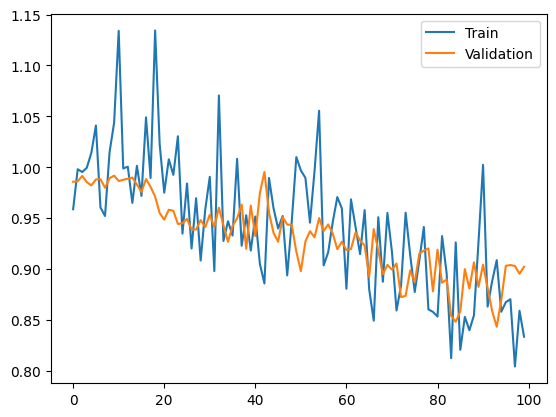

In [ ]:
plt.plot(train_losses, label="Train")
plt.plot(validation_losses, label="Validation")
#plt.yscale('log')
plt.legend()

In [ ]:
model.eval() #Swith to evaluation mode, where dropout is switched off
#y_pred_train = model(X_train_t)
y_pred_validation = model(X_validation_t)
#y_pred_test = model(X_test)


In [ ]:
torch.mean(( y_validation_t - y_pred_validation )**2).item()

0.9020845293998718

In [ ]:
X_train_t = smivec.transform(X_train, canonical=False)
X_train_t = torch.tensor(X_train_t, device=device).float()
y_train_t = torch.tensor(y_train, device=device).float()
y_train_t = torch.nan_to_num(y_train_t, nan = torch.nanmean(y_train_t))
X_test_t = smivec.transform(X_test, canonical=False)
X_test_t = torch.tensor(X_test_t, device=device).float()
y_test_t = torch.tensor(y_test, device=device).float()
y_test_t = torch.nan_to_num(y_test_t, nan = torch.nanmean(y_test_t))

In [ ]:
y_pred_train = model(X_train_t)
y_pred_test = model(X_test_t)
train_rmse = torch.mean(( y_train_t - y_pred_train )**2).item()
test_rmse = torch.mean(( y_test_t - y_pred_test )**2).item()
print("Train RMSE: %0.3F\tTest RMSE: %0.3F"%(train_rmse, test_rmse))

Train RMSE: 0.826	Test RMSE: 0.765


In [ ]:
y_pred_train.shape

torch.Size([1, 684, 1])

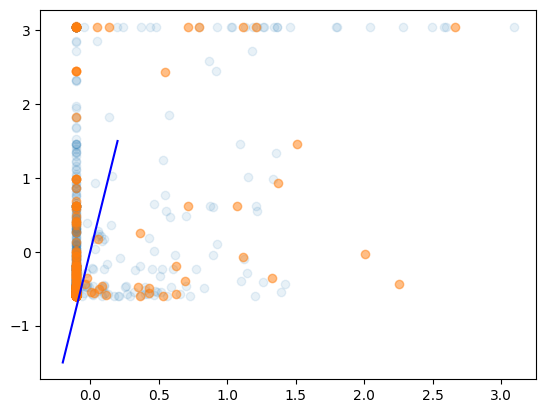

In [ ]:
plt.scatter(np.array(y_pred_train.tolist()).flatten(), np.array(y_train_t.tolist()).flatten(), alpha=0.1)
plt.scatter(np.array(y_pred_validation.tolist()).flatten(), np.array(y_validation_t.tolist()).flatten(), alpha=0.5)
plt.plot([-0.2, 0.2], [-1.5,1.5], c="b")
#plt.xlim(-1,  1)
#plt.ylim(-0.1,  1)